Description:
Visualizing Timit Sound Data with tSNE(t-distributed Stochastic Neighbor Embedding) technique in two dimensions with a Scatter Plot.
The objective is to see some shape or clusters of the 8 vowels ( 'aa', 'ae', 'ah', 'eh', 'ih', 'iy', 'uh', 'uw' ) present in the high-dimensional input data.

Method Used: Exact tSNE

Preprocessing Done: 
Normalization of data according to the 64 dimensional frequency bands.
Transformed the shape of each sample to 192 dimensions.

tSNE Parameters Used:
n_components : 2 (2 dimensions)
Total Samples Used: 100
Learning Rate: 1000 (It can be a critical parameter)
Perplexity: 30 (Effective number of neighbours, size of gaussian)
Other parameters are non- critical, so kept default.

Labels or Legends: The 8 timit vowels each in a different color.

In [54]:
import sys
sys.path.append('/home/deva/PycharmProjects/Visualizing-Bioacoustic-Big-Data/tSNE_lib')
from dataset import Dataset
from tSNE_utils import tSNE
from plot_embedding import Plot_embedding as Pl
from time import time
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import urllib.request
%matplotlib inline

Give a link to the input file for tSNE

In [55]:
file_name, headers = urllib.request.urlretrieve('http://sabiod.univ-tln.fr/workspace/TIMIT/features/dataset_chirplet.jl')

The File is stored temporarily in the system.

In [56]:
file_name

'/tmp/tmp1blb8xhb'

Call the Dataset Class for processing the data and labels

In [57]:
dataset = Dataset(file_name) 
os.remove(file_name)

Get the Data for the tSNE from the Dataset Object

In [58]:
data = dataset.data

In [59]:
data

array([[-0.63886093, -3.70778967,  2.04893738, ...,  2.77891863,
         1.91507511,  1.32852051],
       [ 0.30937609, -2.1013132 ,  0.66201369, ...,  1.08544513,
         3.15766032,  0.72474895],
       [ 0.58442191, -2.21605482,  0.1233555 , ..., -1.28374652,
        -1.29172311,  0.91281973],
       ..., 
       [ 0.12841398,  0.68825637, -1.14529532, ..., -0.12027072,
         1.08039865, -1.12605305],
       [-0.13125757,  0.82243588, -0.73394857, ..., -0.9163407 ,
        -0.13165842,  1.06834889],
       [-0.35510276,  1.30649522, -0.56186696, ..., -1.17487744,
        -1.46408127,  1.84584494]])

In [60]:
data.shape

(361874, 39)

Get the Labels array from the Dataset Object

In [61]:
labels = dataset.labels

In [62]:
labels

array([5, 5, 5, ..., 4, 4, 4])

In [63]:
labels.shape

(361874,)

Specify the Legends for the labels and the colors.

In [64]:
vowels = ['aa', 'ae', 'ah', 'eh', 'ih', 'iy', 'uh', 'uw'] 
color= ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf']

Set Desired tSNE parameters for running tSNE

In [65]:
per= 30                                                                      
l_rate= 1000.0

Choose the number of samples on which you want to run tSNE.

In [66]:
n_samp = 100

Get a random subsample to run tSNE

In [67]:
indices = np.arange(len(data))
random.shuffle(indices)
chosen_sample = indices[:n_samp]

You can see the randomly chosen samples!

In [68]:
chosen_sample

array([ 53525, 319454, 188033,  68519, 193919,  45102, 337352, 210422,
       183810, 198474, 246244,  63047, 292671, 328269, 335867, 142940,
       132628, 330035,  77965, 171102,  61984, 302501,    741, 247058,
       343144,  43097, 165907, 226331, 212593,  42930, 265940, 239689,
       255586, 107471, 166054,  73904, 120653, 248376,  67485, 228887,
        17561, 291621, 306443, 185479, 346767, 294784, 258568, 189245,
       173670, 187610, 125751, 262449,  20226, 311196, 173400, 346176,
       122068,  20464, 263769, 151934, 325353, 121552, 196927,  55083,
       297980,  50532, 257702, 291281, 323172,  69449, 305602,  44426,
       182673, 129194,  65748, 134488, 127375,  52518, 118234,  39328,
       354037, 166433,  23152, 350448,  41714,  18148, 302646, 163809,
       318966, 172314,  28028,  97618, 295818, 272986,  25481, 315238,
       317947, 164021, 354134, 330150])

Run tSNE by calling the object of class tSNE with desired parameters.

In [69]:
o = tSNE(data,chosen_sample,labels=labels,method='exact')
Y = o.output()
Y

array([[ -9.53018497e+01,   7.76853826e+01],
       [  6.85997569e+02,  -1.14054768e+03],
       [ -1.51850905e+02,   3.96557942e+02],
       [  4.25985599e+02,  -1.48970555e+03],
       [ -6.76092786e+02,  -1.29555805e+03],
       [ -1.43568568e+01,  -9.61583682e+01],
       [ -9.88063046e+01,   7.24750979e+00],
       [  1.11661101e+02,  -7.40835819e+01],
       [ -6.23561192e+01,  -8.87748455e+01],
       [ -3.64737943e+02,  -1.86281828e+02],
       [ -4.11370841e+02,   1.03101022e+03],
       [ -4.10765276e+01,  -1.37665549e+01],
       [ -1.36302812e+02,   1.92472284e+01],
       [  5.22325215e+02,  -2.32758087e+01],
       [ -1.12023212e+03,  -8.37412138e+02],
       [  4.40185731e+02,  -9.24541358e+01],
       [ -5.77817500e+01,   1.45839431e+03],
       [  1.91812479e+02,   2.29171488e+01],
       [ -9.44664453e+01,   1.13624772e+02],
       [  2.33764298e+01,  -1.01819048e+02],
       [  1.35004939e+02,  -3.54631060e+01],
       [  7.50749138e+01,  -8.25304049e+01],
       [  

Saving the tSNE coordinates and plotting the result.

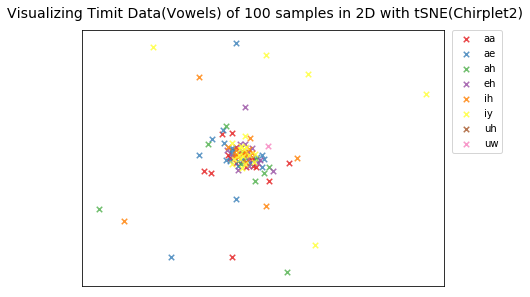

In [70]:
np.savetxt("Chirplet_tSNEcoordinates.txt", Y)

title= "Visualizing Timit Data(Vowels) of %i samples in 2D with tSNE(Chirplet)"% (n_samp)

Pl(Y, o.train_labels, vowels, color, title)

plt.show()